<a href="https://colab.research.google.com/github/jgardien/AID/blob/main/DM_TP_20250321_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab Base para el Trabajo Práctico (versión 1)
Programa de creación de entregas. Versión 1

In [ ]:
import pandas as pd

import sklearn as sk
from sklearn import model_selection
from sklearn import ensemble
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 0. Lectura de datos

In [ ]:
# TODO: Cambiar para que apunte al directorio correcto
DIR = "/content/drive/MyDrive/Clases/FCEN DM/datos/properati"

In [ ]:
df_ent = pd.read_csv(f"{DIR}/entrenamiento.zip", index_col="id")
df_ent.head()

,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4,...,bathrooms,surface_total,surface_covered,currency,price_period,title,description,property_type,operation_type,price
id,,,,,,,,,,,,,,,,,,,,,
556713,Propiedad,2019-11-29,9999-12-31,2019-11-29,-58.442399,-34.573623,Argentina,Capital Federal,Colegiales,NaN,...,2.0,NaN,NaN,USD,NaN,"Departamento en Venta en Belgrano, Capital fed...","Sup total por escritura: 96,47 m2 (cubiertos: ...",Departamento,Venta,259000.0
257134,Propiedad,2019-08-17,9999-12-31,2019-08-17,-58.420737,-34.631770,Argentina,Capital Federal,Boedo,NaN,...,1.0,74.0,47.0,USD,NaN,PH Venta Boedo 2 amb Patio,Corredor Responsable: MARCELO TRUJILLO - CPI ...,PH,Venta,140000.0
521738,Propiedad,2019-08-05,2019-08-31,2019-08-05,-58.429983,-34.607225,Argentina,Capital Federal,Almagro,NaN,...,1.0,66.0,64.0,USD,NaN,Venta 3 Ambientes - Almagro - Balcón - Ameniti...,Corredor Responsable: Marcelo Trujillo - CUCIC...,Departamento,Venta,173000.0
383947,Propiedad,2019-10-23,2019-11-08,2019-10-23,-58.420780,-34.608640,Argentina,Capital Federal,Almagro,NaN,...,1.0,55.0,55.0,USD,NaN,Depto.tipo casa de 3 ambientes en Venta en Alm...,"Muy Lindo ph al contrafrente con 2 patios!, 80...",PH,Venta,155000.0
986212,Propiedad,2019-08-01,2019-08-14,2019-08-01,-58.371394,-34.621835,Argentina,Capital Federal,San Telmo,NaN,...,1.0,42.0,42.0,USD,NaN,Ph en edificio de estilo Frances . 2 dormitori...,PH en Edificio Frances en Estado original!!!al...,PH,Venta,74000.0


In [ ]:
# cantidad de filas y columnas
df_ent.shape

(985180, 24)

## 1. Entender los datos (AID)

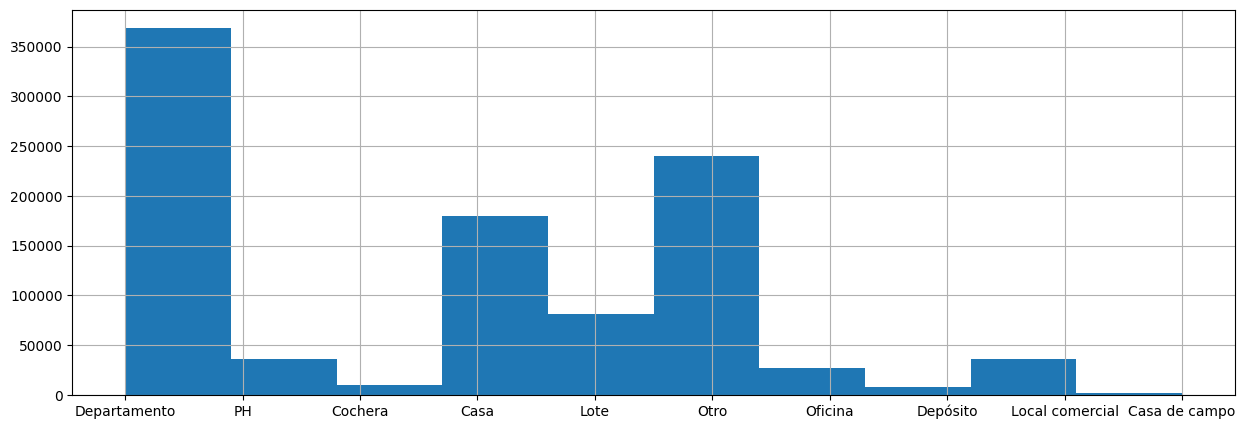

In [ ]:
df_ent["property_type"].hist(figsize=(15,5));

## 2. Limpiar y transformar los datos (MD)

In [ ]:
# Selección de datos. Solo a fines demostrativos.
# TODO: cambiar!
df_ent = df_ent.loc[(df_ent["l2"] == "Córdoba") & (df_ent["operation_type"] == 'Venta') & (df_ent["property_type"] == "Casa")]
df_ent.shape

(11100, 24)

In [ ]:
# La creación de modelos requiere que no haya valores perdidos
# por eso llenamos todo con 0 a lo bestia
# TODO: mejorar la imputación de valores perdidos
df_ent = df_ent.fillna(0)

<ipython-input-14-ba9b88247318>:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_ent = df_ent.fillna(0)


## 3. Entrenamiento del modelos (AA)

In [ ]:
# La creación de modelos requiere que todo el dataframe sea numérico
# Me quedo con las columnas numéricas solamente
# TODO: traducir las columnas con datos no numéricos a numéricos para que mejoren los modelos
df_ent = df_ent.select_dtypes('number')

X = df_ent[df_ent.columns.drop('price')]
y = df_ent['price']

In [ ]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

# Definimos el valor de los hiperparámetros a usar por el modelo
# TODO: hacer pruebas cambiando los valores de los hiperparámetros para mejorar el score
n_estimators = 50
max_depth = 5

### NO CAMBIAR RandomForestRegressor por otro modelo
### NOTA: Si en la primera entrega usan otro modelo, su nota será 0
### Pueden cambiar los hiperparámetros que afectan al árbol: n_estimators, criterion, max_depth, min_samples_split, min_samples_leaf, min_weight_fraction_leaf, max_features, max_leaf_nodes, min_impurity_decrease
reg = sk.ensemble.RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, n_jobs=-1, random_state=42)

# Entrenamos el modelo
_ = reg.fit(X_train, y_train)

# Cálculo del error en entrenamiento (train)
y_pred = reg.predict(X_train)
score_train = sk.metrics.root_mean_squared_error(y_train, y_pred)

# Cálculo del error en prueba (test)
y_pred = reg.predict(X_test)
score_test  = sk.metrics.root_mean_squared_error(y_test,  y_pred)

print(f"{n_estimators=} -- {max_depth=} --> {score_train=:.2f} - {score_test=:.2f}")

n_estimators=50 -- max_depth=5 --> score_train=831171.47 - score_test=990937.52


## 4. Solución para subir Kaggle

In [ ]:
df_ap = pd.read_csv(f"{DIR}/a_predecir.zip", index_col="id")
df_ap.head()

,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4,...,bathrooms,surface_total,surface_covered,currency,price_period,title,description,property_type,operation_type,price
id,,,,,,,,,,,,,,,,,,,,,
1068,Propiedad,2020-06-21,2020-06-27,2020-06-21,NaN,NaN,Argentina,Capital Federal,Palermo,Palermo Viejo,...,1.0,286.0,160.0,USD,NaN,Casa de 4 ambientes en Venta en Palermo viejo,TRIPLEX EN MEDIO TERRENO DE 4 AMB MUY AMPLIOS...,Casa,Venta,NaN
1069,Propiedad,2020-06-21,2020-06-27,2020-06-21,-58.426576,-34.590987,Argentina,Capital Federal,Palermo,NaN,...,5.0,444.0,270.0,USD,NaN,Casa de 8 ambientes en Venta en Palermo,OPORTUNIDAD!! Edificio en Block desarrollado e...,Casa,Venta,NaN
1073,Propiedad,2020-06-21,2020-06-24,2020-06-21,-58.479808,-34.631266,Argentina,Capital Federal,Floresta,NaN,...,2.0,166.0,120.0,USD,NaN,Venta de casa en PH en Floresta,Casa con muy buena distribución y de amplios a...,Casa,Venta,NaN
1082,Propiedad,2020-06-21,2020-06-27,2020-06-21,-58.437889,-34.603291,Argentina,Capital Federal,Villa Crespo,NaN,...,3.0,352.0,185.0,USD,NaN,Casa de 5 ambientes en Venta en Villa crespo,SON 185 METROS CUBIERNTOS CON COCHERA MAS PATI...,Casa,Venta,NaN
1091,Propiedad,2020-06-21,2020-06-27,2020-06-21,-58.476461,-34.602494,Argentina,Capital Federal,Villa del Parque,NaN,...,2.0,168.0,106.0,USD,NaN,Venta de casa de tres ambientes en Villa del P...,"Hermosa casa ubicada en zona residencial, sobr...",Casa,Venta,NaN


In [ ]:
df_ap.shape

(7012, 24)

In [ ]:
X = df_ent[df_ent.columns.drop('price')]
y = df_ent['price']

# Entrenamos el modelo con todos los datos de entrenamiento.csv
reg.fit(X, y)

RandomForestRegressor(max_depth=5, n_estimators=50, n_jobs=-1, random_state=42)

In [ ]:
# Hacemos en df_ap la misma limpieza que en df_ent
df_ap = df_ap.fillna(0)

df_ap = df_ap.select_dtypes('number')

X_ap = df_ap[X.columns]
# y_ap = df_ap['price'] # no es necesario!

# Predecimos los precios del dataset a predecir
y_pred_ap = reg.predict(X_ap)
y_pred_ap

array([285834.93677376, 888790.72244407, 678120.22345231, ...,
       529589.94183528, 594790.49739084, 594790.49739084])

In [ ]:
# Lleno el precio de df_ap con las predicciones
df_ap["price"] = y_pred_ap

# Grabo el df_ap en un archivo csv para subir a Kaggle
df_ap["price"].to_csv("solucion.csv")